In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
# Display the code being executed
print("# Load the dataset")
print("df = pd.read_csv('1.-2022-23-energy-and-emissions-facilities-and-fleets-en.csv', encoding='UTF-8-SIG')")
print("\
# Display basic information about the dataset")
print("print(df.info())")
print("print(df.head())")
print("print(df.describe())")
print("print(df.isnull().sum())")

# Load the dataset
df = pd.read_csv('1.-2022-23-energy-and-emissions-facilities-and-fleets-en.csv', encoding='UTF-8-SIG')
# Display basic information about the dataset
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())


In [3]:
# Load the dataset
df = pd.read_csv('../data-collection/1.-2022-23-energy-and-emissions-facilities-and-fleets-en.csv', encoding='UTF-8-SIG')

In [4]:
# Display basic information about the dataset
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())

print("\
# Encode categorical variables")
print("df_encoded = pd.get_dummies(df, columns=['Federal organization', 'Fiscal year', 'GHG source', 'Energy category'])")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Federal organization  2075 non-null   object 
 1   Fiscal year           2075 non-null   object 
 2   GHG source            2075 non-null   object 
 3   GHG scope             2075 non-null   int64  
 4   Energy category       2075 non-null   object 
 5   Energy use (GJ)       2075 non-null   float64
 6   Emissions (kt)        2075 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 113.6+ KB
None
               Federal organization Fiscal year  GHG source  GHG scope   
0  Agriculture and Agri-Food Canada     2005-06  facilities          1  \
1  Agriculture and Agri-Food Canada     2005-06       fleet          1   
2  Agriculture and Agri-Food Canada     2005-06  facilities          2   
3  Agriculture and Agri-Food Canada     2005-06  facilities          2

In [5]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Federal organization', 'Fiscal year', 'GHG source', 'Energy category'])

print("\
# Normalize numerical features")
print("scaler = StandardScaler()")
print("df_encoded[['Energy use (GJ)', 'Emissions (kt)']] = scaler.fit_transform(df_encoded[['Energy use (GJ)', 'Emissions (kt)']])")

# Normalize numerical features
scaler = StandardScaler()
df_encoded[['Energy use (GJ)', 'Emissions (kt)']] = scaler.fit_transform(df_encoded[['Energy use (GJ)', 'Emissions (kt)']])


In [6]:
# Normalize numerical features
scaler = StandardScaler()
df_encoded[['Energy use (GJ)', 'Emissions (kt)']] = scaler.fit_transform(df_encoded[['Energy use (GJ)', 'Emissions (kt)']])




In [7]:
print("\
# Check for outliers using IQR method")

# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("\
outliers_energy = detect_outliers(df, 'Energy use (GJ)')")
print("outliers_emissions = detect_outliers(df, 'Emissions (kt)')")
print("print(f'Number of outliers in Energy use (GJ): {len(outliers_energy)}')")
print("print(f'Number of outliers in Emissions (kt): {len(outliers_emissions)}')")

outliers_energy = detect_outliers(df, 'Energy use (GJ)')
outliers_emissions = detect_outliers(df, 'Emissions (kt)')
print(f'Number of outliers in Energy use (GJ): {len(outliers_energy)}')
print(f'Number of outliers in Emissions (kt): {len(outliers_emissions)}')


# Check for outliers using IQR method
outliers_energy = detect_outliers(df, 'Energy use (GJ)')
outliers_emissions = detect_outliers(df, 'Emissions (kt)')
print(f'Number of outliers in Energy use (GJ): {len(outliers_energy)}')
print(f'Number of outliers in Emissions (kt): {len(outliers_emissions)}')
Number of outliers in Energy use (GJ): 279
Number of outliers in Emissions (kt): 273


# Correlation analysis


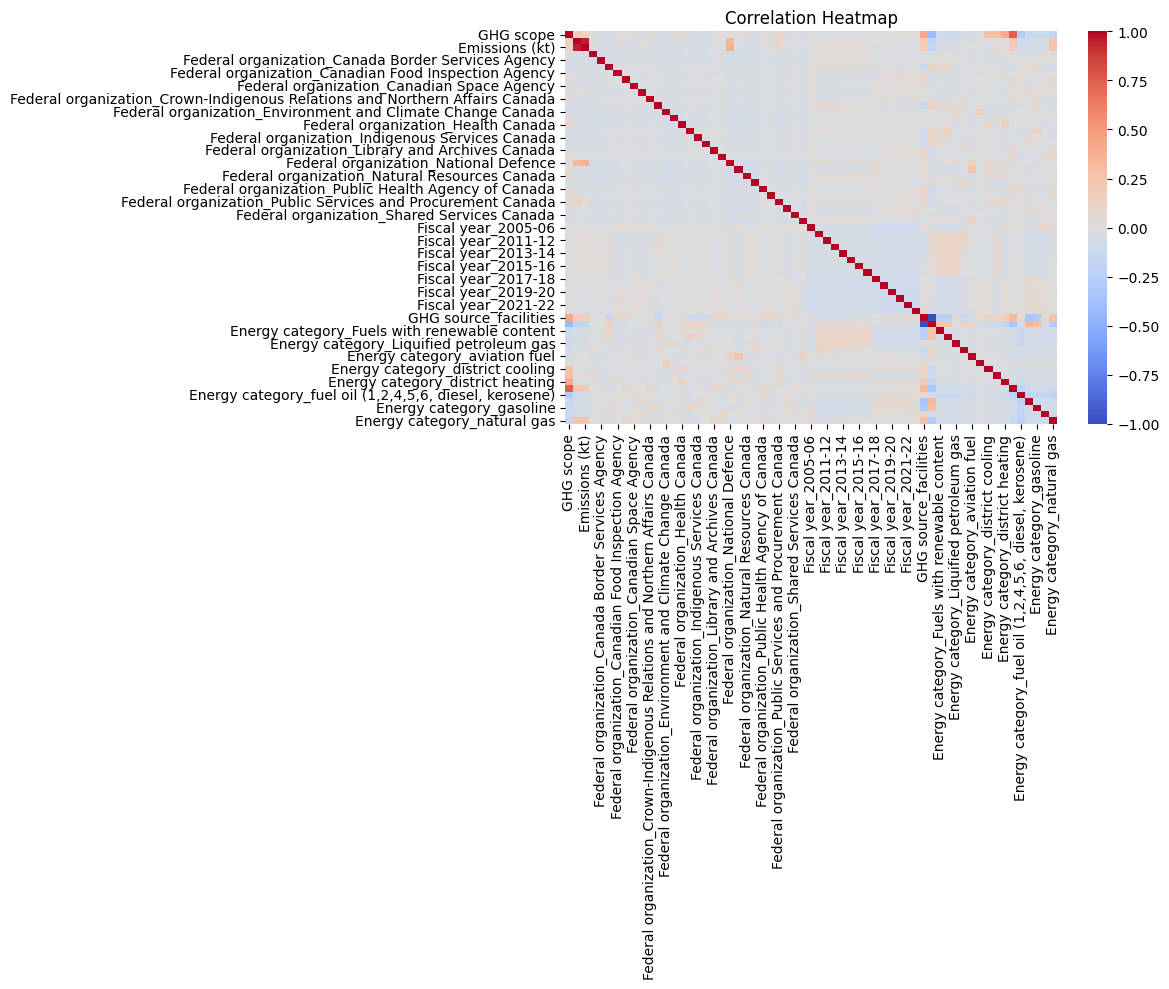

plt.savefig('correlation_heatmap.png')
plt.close()


In [8]:
print("\
# Correlation analysis")

# Correlation analysis
corr_matrix = df_encoded.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
print("plt.savefig('correlation_heatmap.png')")
print("plt.close()")

# Distribution plots


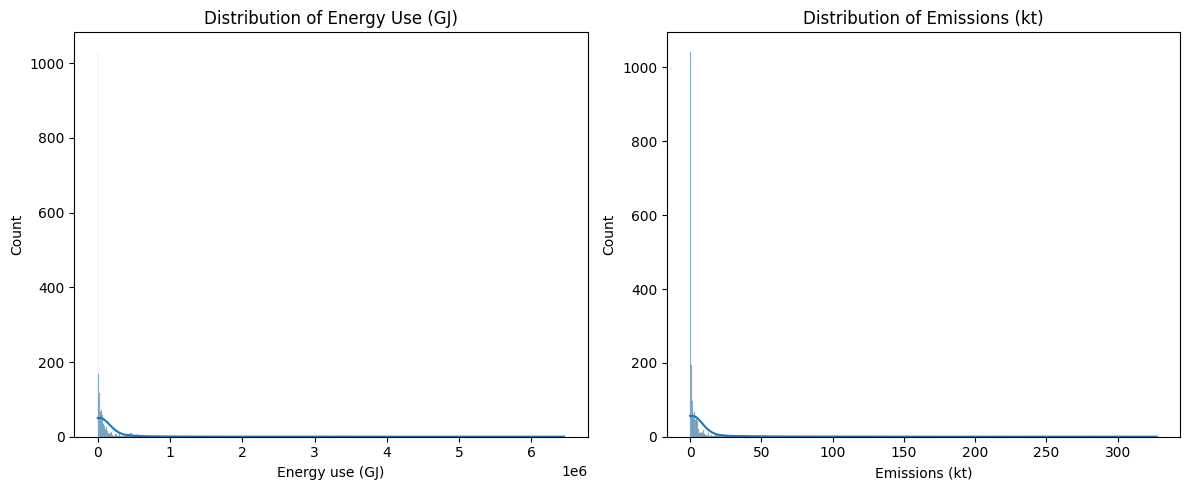

In [9]:
print("\
# Distribution plots")


# Distribution plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Energy use (GJ)'], kde=True)
plt.title('Distribution of Energy Use (GJ)')
plt.subplot(1, 2, 2)
sns.histplot(df['Emissions (kt)'], kde=True)
plt.title('Distribution of Emissions (kt)')
plt.tight_layout()
plt.show()
plt.savefig('distribution_plots.png')
plt.close()


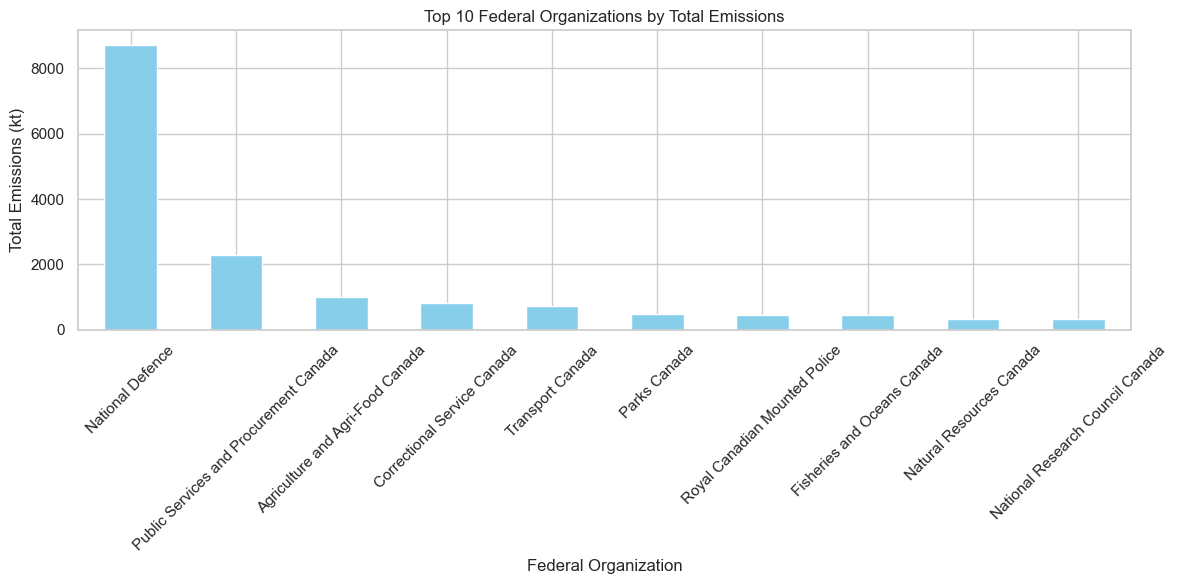

In [11]:
# Set the style for the plots
sns.set(style='whitegrid')

# 1. Total Emissions by Federal Organization
emissions_by_org = df.groupby('Federal organization')['Emissions (kt)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
emissions_by_org.plot(kind='bar', color='skyblue')
plt.title('Top 10 Federal Organizations by Total Emissions')
plt.xlabel('Federal Organization')
plt.ylabel('Total Emissions (kt)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_10_emissions_by_org.png')
plt.show()

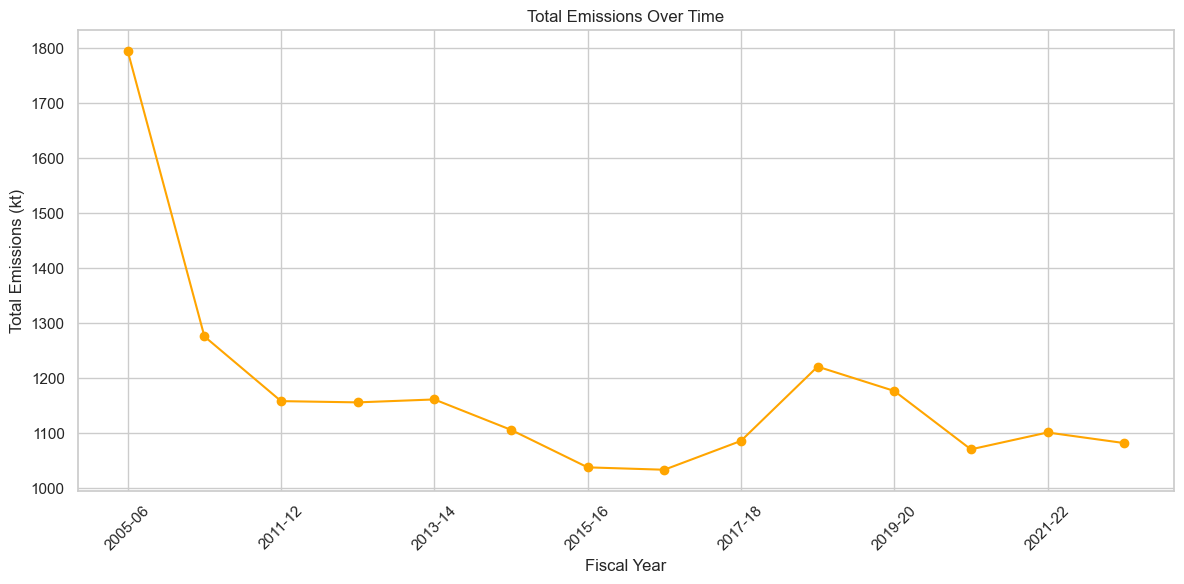

In [12]:
# 2. Emissions Over Time
emissions_over_time = df.groupby('Fiscal year')['Emissions (kt)'].sum()
plt.figure(figsize=(12, 6))
emissions_over_time.plot(kind='line', marker='o', color='orange')
plt.title('Total Emissions Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Emissions (kt)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('emissions_over_time.png')
plt.show()


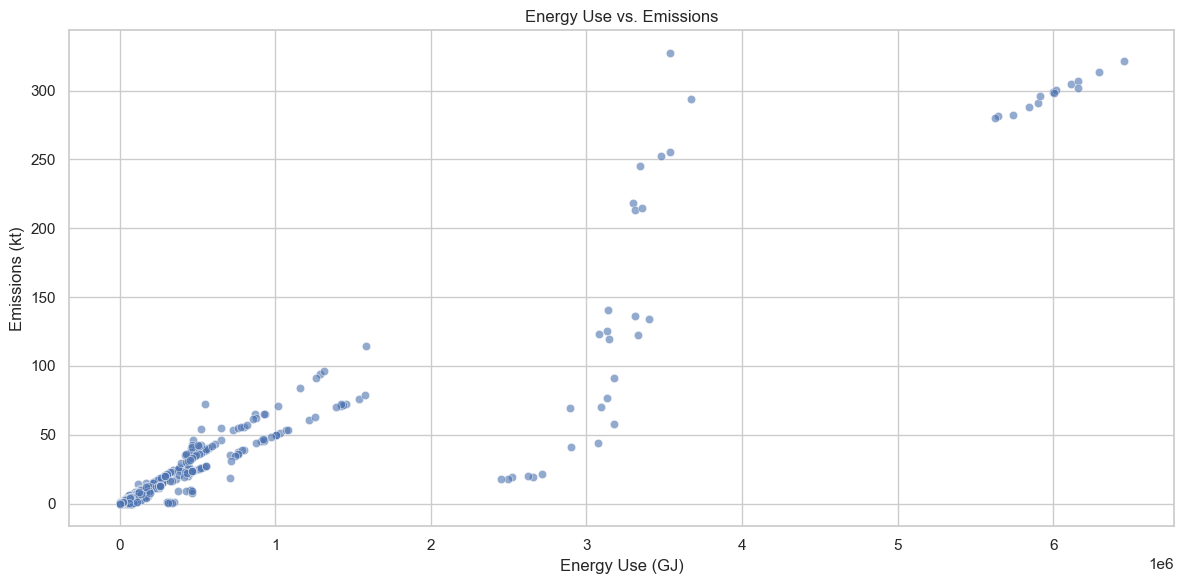

In [13]:
# 3. Energy Use vs. Emissions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Energy use (GJ)', y='Emissions (kt)', alpha=0.6)
plt.title('Energy Use vs. Emissions')
plt.xlabel('Energy Use (GJ)')
plt.ylabel('Emissions (kt)')
plt.tight_layout()
plt.savefig('energy_use_vs_emissions.png')
plt.show()

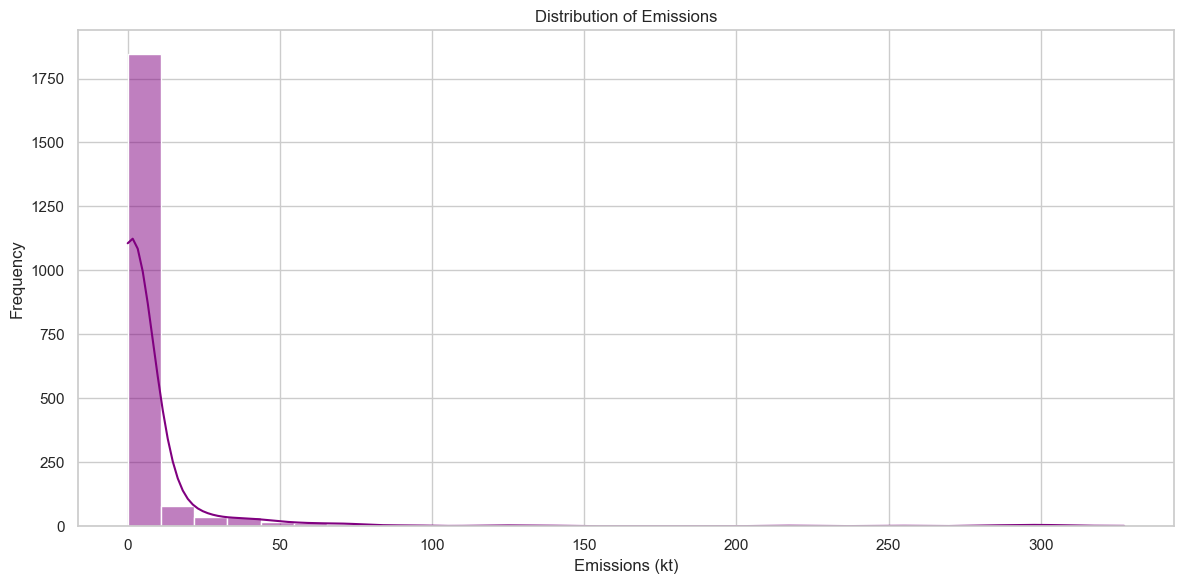

In [14]:
# 4. Distribution of Emissions
plt.figure(figsize=(12, 6))
sns.histplot(df['Emissions (kt)'], bins=30, kde=True, color='purple')
plt.title('Distribution of Emissions')
plt.xlabel('Emissions (kt)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('distribution_of_emissions.png')
plt.show()

In [16]:
# 1. Chi-Square Test
# H0: There is no association between GHG source (facilities vs. fleet) and GHG scope
# H1: There is an association between GHG source and GHG scope

contingency_table = pd.crosstab(df['GHG source'], df['GHG scope'])
chi2, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print("1. Chi-Square Test Results:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value_chi2}")
print(f"Degrees of freedom: {dof}")
print("Conclusion: ", "Reject H0" if p_value_chi2 < 0.05 else "Fail to reject H0")
print()

1. Chi-Square Test Results:
Chi-square statistic: 379.3559236916529
p-value: 1.7186485886669624e-84
Degrees of freedom: 1
Conclusion:  Reject H0



In [17]:
# 2. T-Test
# H0: The mean emissions from facilities and fleets are the same
# H1: The mean emissions from facilities and fleets are different

facilities_emissions = df[df['GHG source'] == 'facilities']['Emissions (kt)']
fleet_emissions = df[df['GHG source'] == 'fleet']['Emissions (kt)']

t_statistic, p_value_ttest = stats.ttest_ind(facilities_emissions, fleet_emissions)

print("2. T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"p-value: {p_value_ttest}")
print("Conclusion: ", "Reject H0" if p_value_ttest < 0.05 else "Fail to reject H0")
print()

2. T-Test Results:
T-statistic: 8.50358626339674
p-value: 3.462995655197654e-17
Conclusion:  Reject H0



In [18]:
# 3. F-Test (Levene's test for equal variances)
# H0: The variances of emissions from facilities and fleets are equal
# H1: The variances of emissions from facilities and fleets are not equal

f_statistic, p_value_ftest = stats.levene(facilities_emissions, fleet_emissions)

print("3. F-Test (Levene's test) Results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value_ftest}")
print("Conclusion: ", "Reject H0" if p_value_ftest < 0.05 else "Fail to reject H0")
print()

3. F-Test (Levene's test) Results:
F-statistic: 69.11161360163064
p-value: 1.6615444957817096e-16
Conclusion:  Reject H0



In [19]:
# 4. Wilcoxon Rank-Sum Test
# H0: The distribution of emissions is the same for facilities and fleets
# H1: The distribution of emissions is different for facilities and fleets

w_statistic, p_value_wilcoxon = stats.ranksums(facilities_emissions, fleet_emissions)

print("4. Wilcoxon Rank-Sum Test Results:")
print(f"W-statistic: {w_statistic}")
print(f"p-value: {p_value_wilcoxon}")
print("Conclusion: ", "Reject H0" if p_value_wilcoxon < 0.05 else "Fail to reject H0")
print()

4. Wilcoxon Rank-Sum Test Results:
W-statistic: 17.937135759063597
p-value: 6.049394793286342e-72
Conclusion:  Reject H0



In [20]:
# 5. One-way ANOVA
# H0: The mean emissions are the same across all energy categories
# H1: The mean emissions are different for at least one energy category

energy_categories = df['Energy category'].unique()
emissions_by_category = [df[df['Energy category'] == cat]['Emissions (kt)'] for cat in energy_categories]

f_statistic_anova, p_value_anova = stats.f_oneway(*emissions_by_category)

print("5. One-way ANOVA Results:")
print(f"F-statistic: {f_statistic_anova}")
print(f"p-value: {p_value_anova}")
print("Conclusion: ", "Reject H0" if p_value_anova < 0.05 else "Fail to reject H0")

5. One-way ANOVA Results:
F-statistic: 17.124998343417893
p-value: 1.2920219716085995e-40
Conclusion:  Reject H0
